In [1]:
# Install dependencies if needed
# !pip install langchain langchain-experimental langchain-chroma pillow open_clip_torch torch matplotlib unstructured pydantic
import os
from textbook_loading import (
    load_book,
    clean_and_categorize_elements,
    summarize_elements,
    store_in_chromadb,
    delete_irrelevant_images,
)


In [2]:
pdf_file = './data/shortExample_PARASITES.pdf'
image_output_dir = './figures/parasites'
chroma_persist_dir = './chroma/parasites/'

# Make sure the data directory exists
assert os.path.exists('./data'), "Error: './data' directory not found."
assert os.path.exists(pdf_file), f"Error: PDF file not found at {pdf_file}."

In [3]:
print("📝 Unstructuring textbooks, filtering junks, semanic chunking...")
raw_pdf_elements = load_book(pdf_file, image_output_dir)
print("🎉 1.process_pdf_with_semantic_chunking complete.")


📝 Unstructuring textbooks, filtering junks, semanic chunking...


The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


🎉 1.process_pdf_with_semantic_chunking complete.


In [4]:
# Clean and categorize
texts, tables, images_raw, headers_raw, titles_raw, footers_raw, figure_captions_raw, list_items_raw = clean_and_categorize_elements(raw_pdf_elements, window_size=2)


In [5]:
# Summarize, store, etc.
text_summaries, table_summaries, image_paths, relevant_images_to_summarize, image_summaries = summarize_elements(
    texts, tables, images_raw
)

Texts and Tables Summary Done!
Checking image relevance with local textual context...
Skipping irrelevant image: ./figures/parasites/figure-1-1.jpg
Skipping irrelevant image: ./figures/parasites/figure-2-3.jpg
Skipping irrelevant image: ./figures/parasites/figure-3-4.jpg
Skipping irrelevant image: ./figures/parasites/figure-4-5.jpg
Skipping irrelevant image: ./figures/parasites/figure-6-7.jpg
Skipping irrelevant image: ./figures/parasites/figure-7-8.jpg
Skipping irrelevant image: ./figures/parasites/figure-8-10.jpg
Skipping irrelevant image: ./figures/parasites/figure-9-13.jpg
Skipping irrelevant image: ./figures/parasites/figure-10-14.jpg
Skipping irrelevant image: ./figures/parasites/figure-11-15.jpg
Skipping irrelevant image: ./figures/parasites/figure-12-16.jpg
Skipping irrelevant image: ./figures/parasites/figure-13-17.jpg
Skipping irrelevant image: ./figures/parasites/figure-14-18.jpg
Number of relevant images: 5
Generating LLM summaries for relevant images...


In [6]:
retriever = store_in_chromadb(
    text_summaries, texts, table_summaries, tables, image_paths,
    relevant_images_to_summarize, image_summaries,
    persist_directory=chroma_persist_dir
)

In [7]:
delete_irrelevant_images(images_raw, relevant_images_to_summarize)

Successfully deleted irrelevant image: ./figures/parasites/figure-1-1.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-2-3.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-3-4.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-4-5.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-6-7.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-7-8.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-8-10.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-9-13.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-10-14.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-11-15.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-12-16.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-13-17.jpg
Successfully deleted irrelevant image: ./figures/parasites/figure-14-18.jpg
Finished deleting images. 

In [8]:
# import os
sound_file = "/System/Library/Sounds/Glass.aiff"
os.system(f"afplay '{sound_file}'")

0

# Inspecting Retrieved Docs

In [12]:
query = "What do cat intestinal parasites look like and how do they affect cats?"

---------------------------------------- Here are the retrieved original_docs with similarity scores ----------------------------------------
----------------------------------------
🔎 Similarity Score: 1.4607
🖼️ Modality: image_summary
📝 Summary/Chunk: The image is a diagram illustrating the life cycle of Dipylidium caninum, which affects cats. It shows three stages in the lifecycle with corresponding arrows indicating progression from one stage to another:
1. The first stage depicts individual eggs or egg packets.
2. The second stage illustrates segments that pass through the cat's stool and around its recumbent body (1).
3. Finally, it shows a flea eating these segments or egg packets (2), which are then ingested by the cat while grooming itself (3). This cycle highlights how fleas transmit Dipylidium caninum to cats.
The image is relevant for veterinary professionals as it provides an educational tool on parasitic infections in domestic animals.
Summary Metadata: {'image_path': './

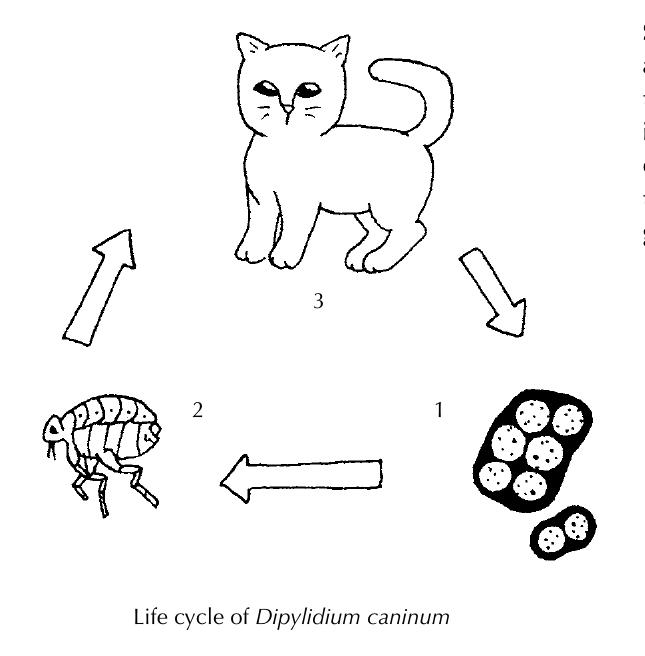

----------------------------------------
🔎 Similarity Score: 1.1795
🖼️ Modality: image
📝 Summary/Chunk: ./figures/parasites/figure-9-11.jpg
Summary Metadata: {'doc_id': 'f96102cc-a8d0-4529-8a78-b8115f40e423', 'image_path': './figures/parasites/figure-9-11.jpg', 'type': 'image', 'summary': "The image is a diagram illustrating the life cycle of Dipylidium caninum, which affects cats. It shows three stages in the lifecycle with corresponding arrows indicating progression from one stage to another:\n1. The first stage depicts individual eggs or egg packets.\n2. The second stage illustrates segments that pass through the cat's stool and around its recumbent body (1).\n3. Finally, it shows a flea eating these segments or egg packets (2), which are then ingested by the cat while grooming itself (3). This cycle highlights how fleas transmit Dipylidium caninum to cats.\nThe image is relevant for veterinary professionals as it provides an educational tool on parasitic infections in domestic anim

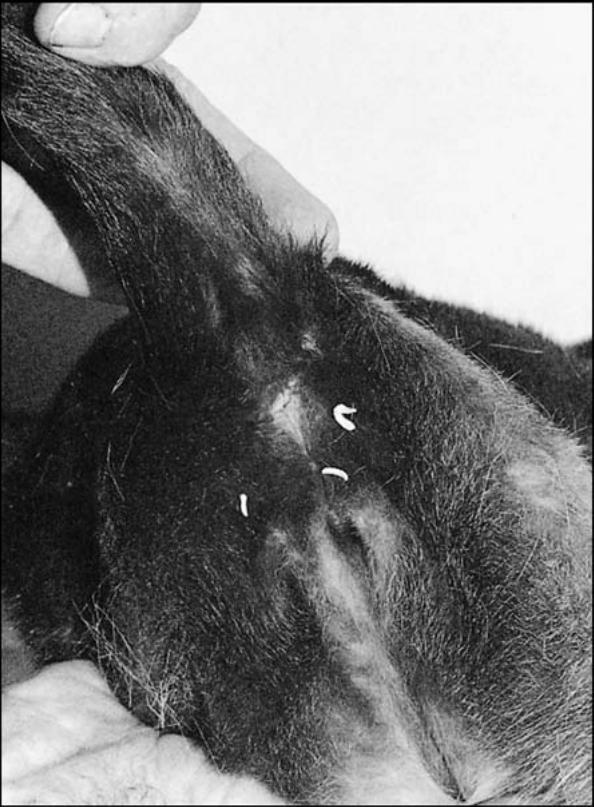

----------------------------------------
🔎 Similarity Score: 1.0892
🖼️ Modality: image
📝 Summary/Chunk: ./figures/parasites/figure-8-9.jpg
Summary Metadata: {'summary': "The image shows a close-up view of an animal's body with visible segments that contain egg packets indicative of tapeworms. These are internal parasites commonly found in adult cats and can be identified by their segmented bodies, which may resemble grains of rice when dry or moist segments capable of movement within the fur around the cat’s anus area.", 'type': 'image', 'doc_id': '950f716a-5c3f-4b6f-8b37-8071c09c1a27', 'image_path': './figures/parasites/figure-8-9.jpg'}
Doc ID: 950f716a-5c3f-4b6f-8b37-8071c09c1a27


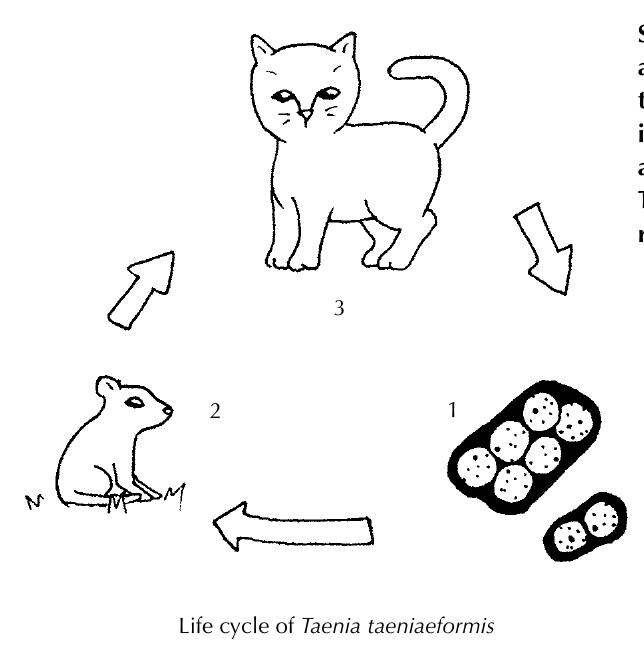

----------------------------------------
🔎 Similarity Score: 1.0133
🖼️ Modality: image
📝 Summary/Chunk: ./figures/parasites/figure-9-12.jpg
Summary Metadata: {'summary': "The image depicts a life cycle diagram of the parasitic worm known as Taenia taeniaeformis. It illustrates how segments pass in stool and around the cat's rectum (stage 1), which are then eaten by fleas, leading to infestation on cats when they groom themselves (stage 2). The flea is subsequently ingested by rodents during hunting or grooming behavior (stage 3) before being passed back into the environment. This cycle highlights how tapeworms can be transmitted through an intermediate host like a cat and rodent, emphasizing the importance of pet hygiene in preventing parasitic infections.", 'image_path': './figures/parasites/figure-9-12.jpg', 'doc_id': '7df8c4c1-39cf-430b-b036-25777a94b2a9', 'type': 'image'}
Doc ID: 7df8c4c1-39cf-430b-b036-25777a94b2a9


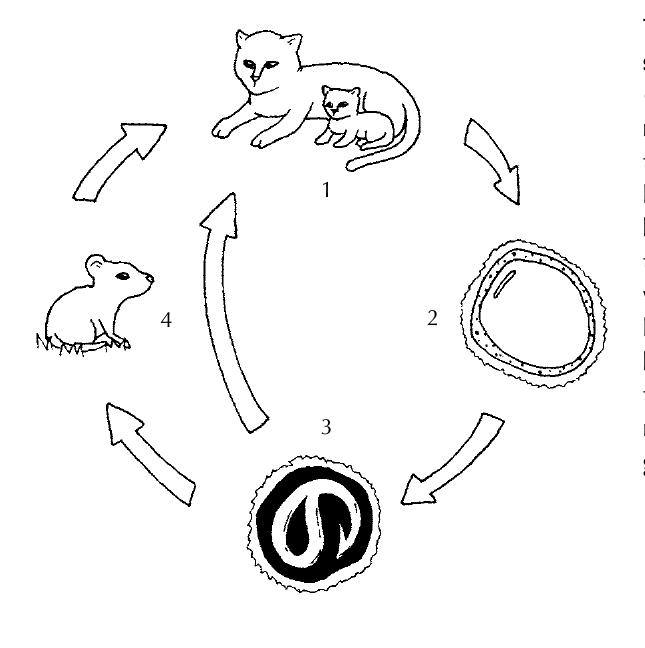

----------------------------------------
🔎 Similarity Score: 0.9915
🖼️ Modality: image
📝 Summary/Chunk: ./figures/parasites/figure-5-6.jpg
Summary Metadata: {'summary': 'The provided image depicts an illustration representing the life cycle of Toxocara cati. It shows a sequence where a female cat (step 1) mates and gives birth to kittens, which then become infected with larvae that can cause infection in humans if ingested by children or pets. The lifecycle continues as these larvae mature into adult worms within the environment before being consumed again by another animal host like rodents (step 4), completing the cycle when a cat eats an infected rodent and becomes reinfected, thus perpetuating the life cycle of Toxocara cati.', 'type': 'image', 'doc_id': '70623275-0e7b-4f11-a714-e1349b0644bf', 'image_path': './figures/parasites/figure-5-6.jpg'}
Doc ID: 70623275-0e7b-4f11-a714-e1349b0644bf
----------------------------------------
🔎 Similarity Score: 0.9565
🖼️ Modality: image_summary

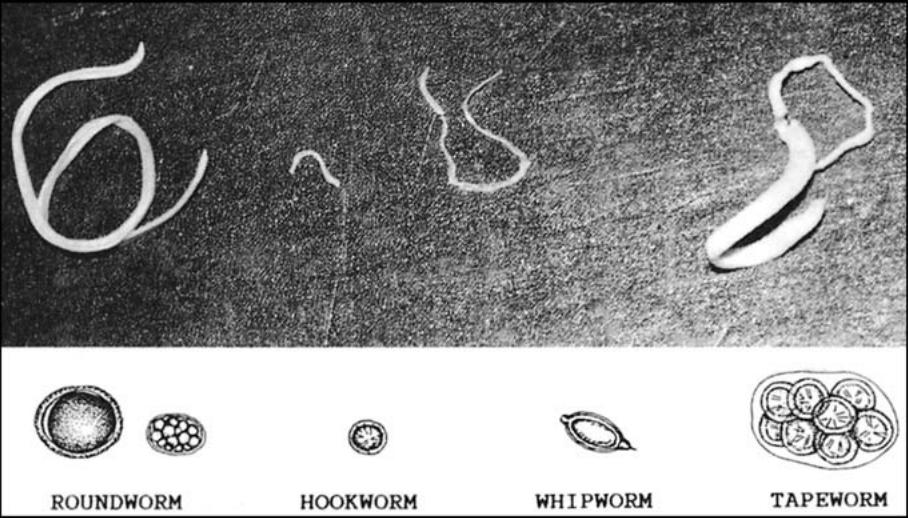

----------------------------------------
🔎 Similarity Score: 0.9430
🖼️ Modality: image
📝 Summary/Chunk: ./figures/parasites/figure-2-2.jpg
Summary Metadata: {'image_path': './figures/parasites/figure-2-2.jpg', 'doc_id': '53d60980-b8bf-49fc-b482-07f949513f28', 'summary': 'The image depicts various types of parasitic worms found in cats along with their respective larvae stages. It includes a comparison between different worm species, such as Roundworms, Hookworms, Whipworms, and Tapeworms, highlighting the differences in size and appearance both at an adult stage and through eggs or larvae forms. This visual serves to educate on parasitic infections common among feline populations, which is crucial for veterinary relevance.', 'type': 'image'}
Doc ID: 53d60980-b8bf-49fc-b482-07f949513f28
----------------------------------------
🔎 Similarity Score: 0.7347
🖼️ Modality: text
📝 Summary/Chunk: Two common tapeworm species found in cats are the Echinococcus multilocularis and Dipylidium caninum

In [13]:
from IPython.display import Image, display

print('-'*40, "Here are the retrieved original_docs with similarity scores",'-'*40)

results = retriever.retrieve_multi_modal(query, k=10)
for res in results:
    if res["modality"] == "image" and os.path.exists(res["summary"]):
        display(Image(filename=res["summary"]))
    print('-' * 40)
    print(f"🔎 Similarity Score: {res['score']:.4f}")
    print(f"🖼️ Modality: {res['modality']}")
    print("📝 Summary/Chunk:", res["summary"])
    print("Summary Metadata:", res["original_metadata"])
    print("Doc ID:", res["doc_id"])

In [11]:
# Only images
image_results = retriever.retrieve(query, k=10, filter={"type": "image"})
# Only text
text_results = retriever.retrieve(query, k=10, filter={"type": "text"})